# Module 5: Comparisons and Relationships

## 🎯 Learning Objectives
By the end of this module, you will be able to:
- Create effective scatter plots for exploring relationships
- Build correlation matrices and heatmaps
- Use pair plots for multivariate exploration
- Distinguish correlation from causation in visualizations
- Apply marginal distributions and regression overlays
- Design comparison charts for multiple groups

## 📊 Datasets Used
- **Gapminder**: Economic and health indicators
- **Palmer Penguins**: Species comparison data
- **Air Quality**: Environmental correlation analysis

## 🔧 Key Libraries
- **matplotlib** and **seaborn**: Core plotting
- **plotly**: Interactive relationships
- **scipy**: Statistical tests
- **pandas**: Data manipulation

---


## 1. Setup and Data Preparation

Understanding relationships between variables is fundamental to data analysis. This module covers various approaches to visualizing comparisons and relationships.

In [1]:
# Essential imports for comparison and relationship visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Configure visualization parameters
plt.style.use('default')
plt.rcParams.update({
    'figure.figsize': (10, 8),
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Set seaborn style for enhanced aesthetics
sns.set_palette("Set2")

print("🔧 Libraries loaded successfully!")
print("📊 Setting up data for relationship analysis...")

# Load and prepare datasets
gapminder = pd.read_csv('../data/gapminder.csv')
penguins = pd.read_csv('../data/penguins.csv')

# Create extended gapminder with derived variables
gapminder['gdp_total'] = gapminder['gdpPercap'] * gapminder['pop']
gapminder['gdp_log'] = np.log10(gapminder['gdpPercap'])
gapminder['pop_millions'] = gapminder['pop'] / 1e6

# Create synthetic air quality data for correlation examples
np.random.seed(42)
n_cities = 100
dates = pd.date_range('2023-01-01', periods=365, freq='D')

# Generate correlated air quality variables
temperature = np.random.normal(20, 10, n_cities)
humidity = 80 - 0.8 * temperature + np.random.normal(0, 5, n_cities)
pm25 = 15 + 0.3 * temperature + 0.2 * (100 - humidity) + np.random.normal(0, 3, n_cities)
ozone = 25 + 0.5 * temperature - 0.1 * humidity + np.random.normal(0, 4, n_cities)
no2 = 20 + 0.2 * pm25 + np.random.normal(0, 2, n_cities)

air_quality = pd.DataFrame({
    'city_id': range(n_cities),
    'temperature': temperature,
    'humidity': np.clip(humidity, 10, 95),
    'pm25': np.clip(pm25, 5, 50),
    'ozone': np.clip(ozone, 10, 60),
    'no2': np.clip(no2, 10, 40),
    'aqi': np.clip(50 + pm25 + 0.5 * ozone + 0.3 * no2, 0, 200)
})

# Add categorical variables
air_quality['region'] = np.random.choice(['North', 'South', 'East', 'West'], n_cities)
air_quality['coastal'] = np.random.choice([True, False], n_cities, p=[0.3, 0.7])
air_quality['population_density'] = np.random.choice(['Low', 'Medium', 'High'], n_cities, p=[0.4, 0.4, 0.2])

print("✅ Data preparation complete!")
print(f"📈 Gapminder: {len(gapminder)} observations across {gapminder['country'].nunique()} countries")
print(f"🐧 Penguins: {len(penguins)} observations across {penguins['species'].nunique()} species")
print(f"🌬️ Air Quality: {len(air_quality)} cities with 6 pollutant measurements")

# Quick data preview
print("\n📋 Dataset Previews:")
print("\n🌍 Gapminder Sample:")
print(gapminder[['country', 'year', 'gdpPercap', 'lifeExp', 'pop_millions']].head(3))

print("\n🐧 Penguins Sample:")
print(penguins[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].head(3))

print("\n🌬️ Air Quality Sample:")
print(air_quality[['temperature', 'humidity', 'pm25', 'ozone', 'aqi', 'region']].head(3))

print("\n🎯 Ready for relationship analysis!")

🔧 Libraries loaded successfully!
📊 Setting up data for relationship analysis...
✅ Data preparation complete!
📈 Gapminder: 210 observations across 10 countries
🐧 Penguins: 300 observations across 3 species
🌬️ Air Quality: 100 cities with 6 pollutant measurements

📋 Dataset Previews:

🌍 Gapminder Sample:
         country  year     gdpPercap    lifeExp  pop_millions
0  United States  2000  37749.984625  84.579617    225.379484
1  United States  2001  47613.756932  83.779836    218.664334
2  United States  2002  41744.514313  83.536632    197.688168

🐧 Penguins Sample:
     species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0  Chinstrap       44.914156      18.624072         198.057880  3635.148633
1     Gentoo       50.082994      13.806115         214.647709  5040.926729
2  Chinstrap       48.505570      18.432982         190.998262  3453.326982

🌬️ Air Quality Sample:
   temperature   humidity       pm25      ozone         aqi region
0    24.967142  52.949433  32.973

## 2. Scatter Plots for Exploring Relationships

Scatter plots are the fundamental tool for visualizing relationships between two continuous variables. They reveal patterns, outliers, and the strength of associations.

### Key Concepts:
- **Correlation vs. Causation**: Visual correlation doesn't imply causation
- **Non-linear relationships**: Look beyond straight-line patterns
- **Outliers**: Points that don't follow the general trend
- **Grouping**: Use color, shape, or size to show categories

Creating comprehensive scatter plot examples...


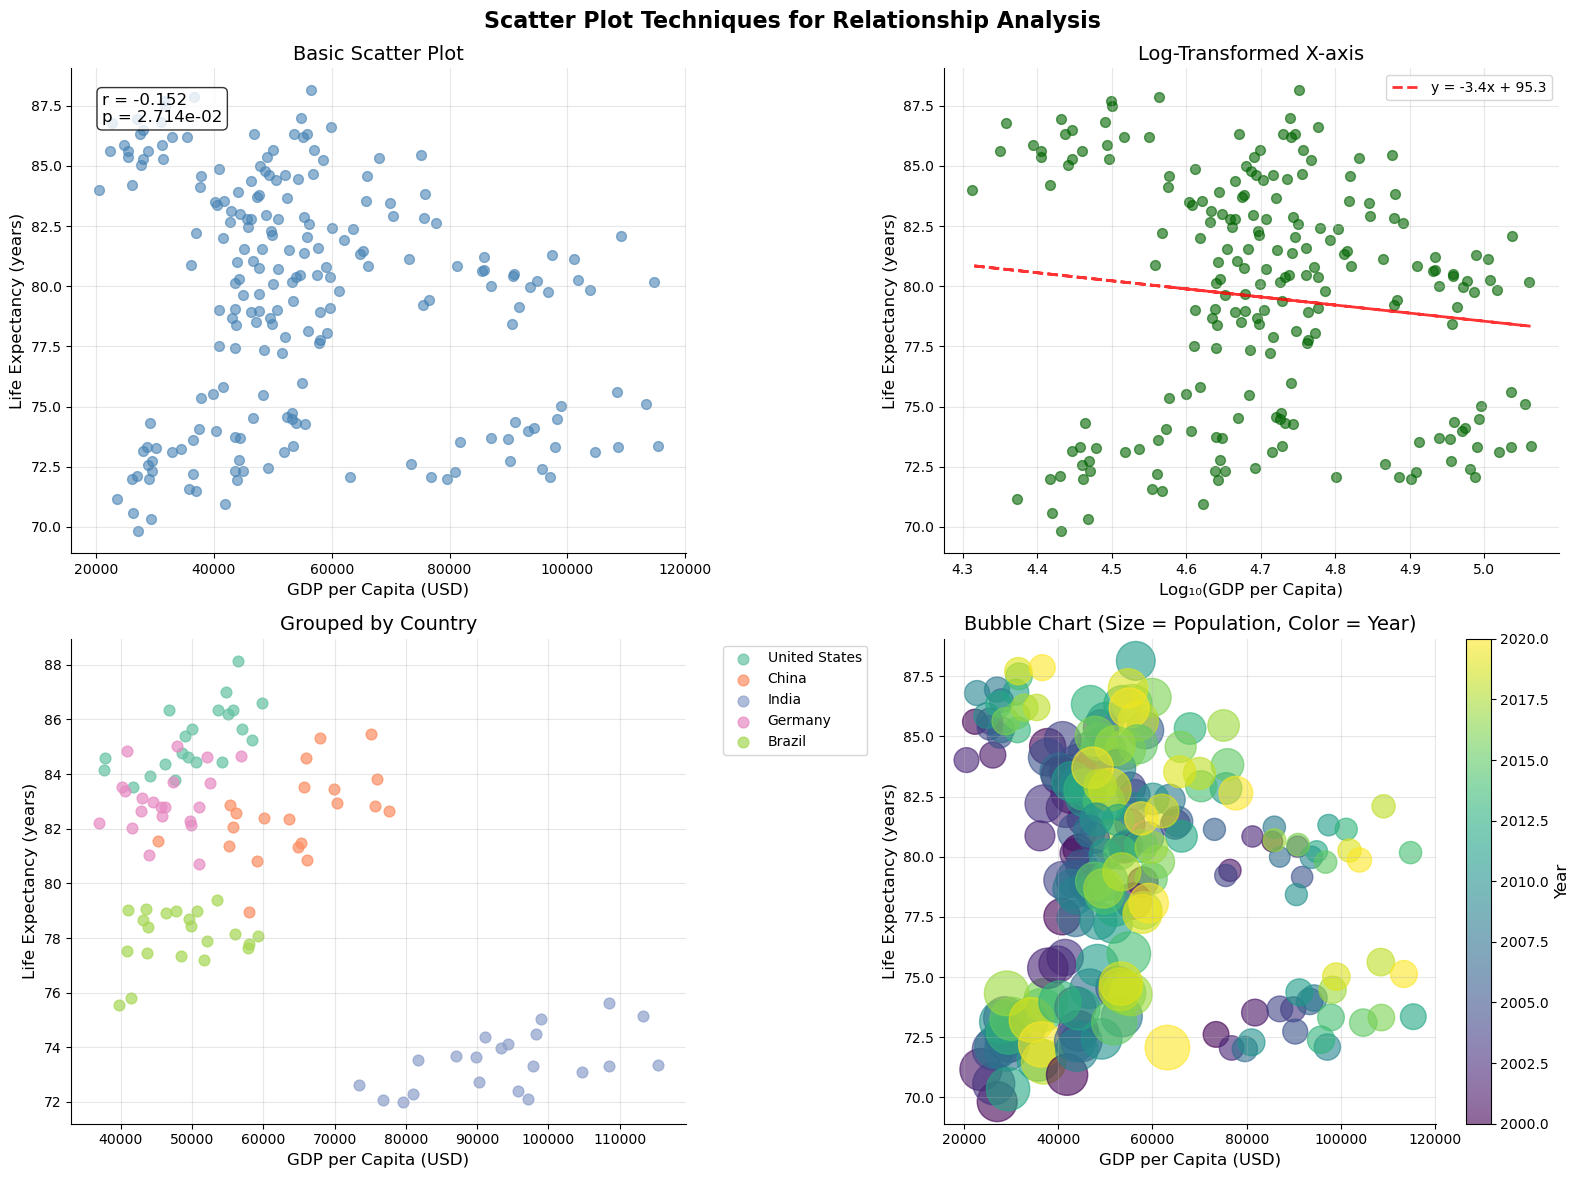


🐧 Creating penguin species comparison...


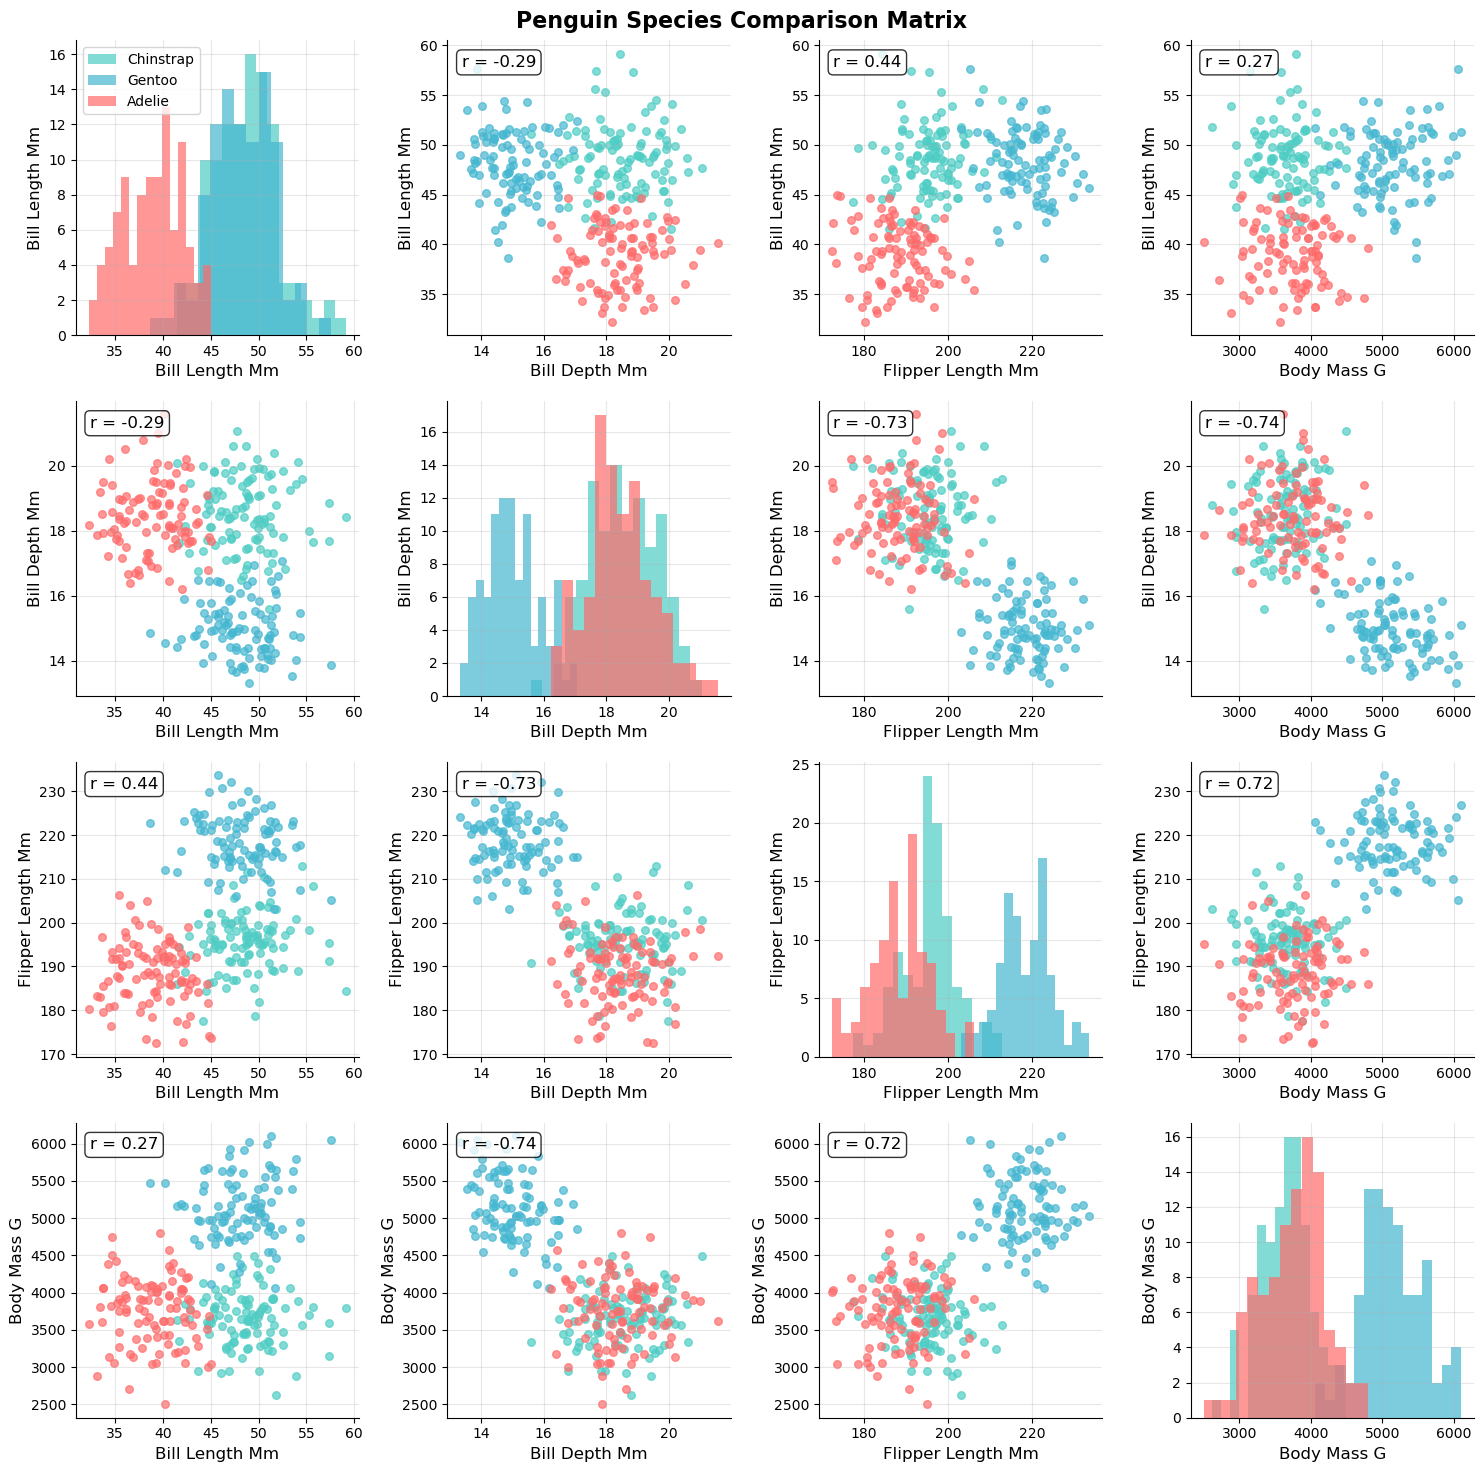


🌬️ Analyzing air quality relationships...


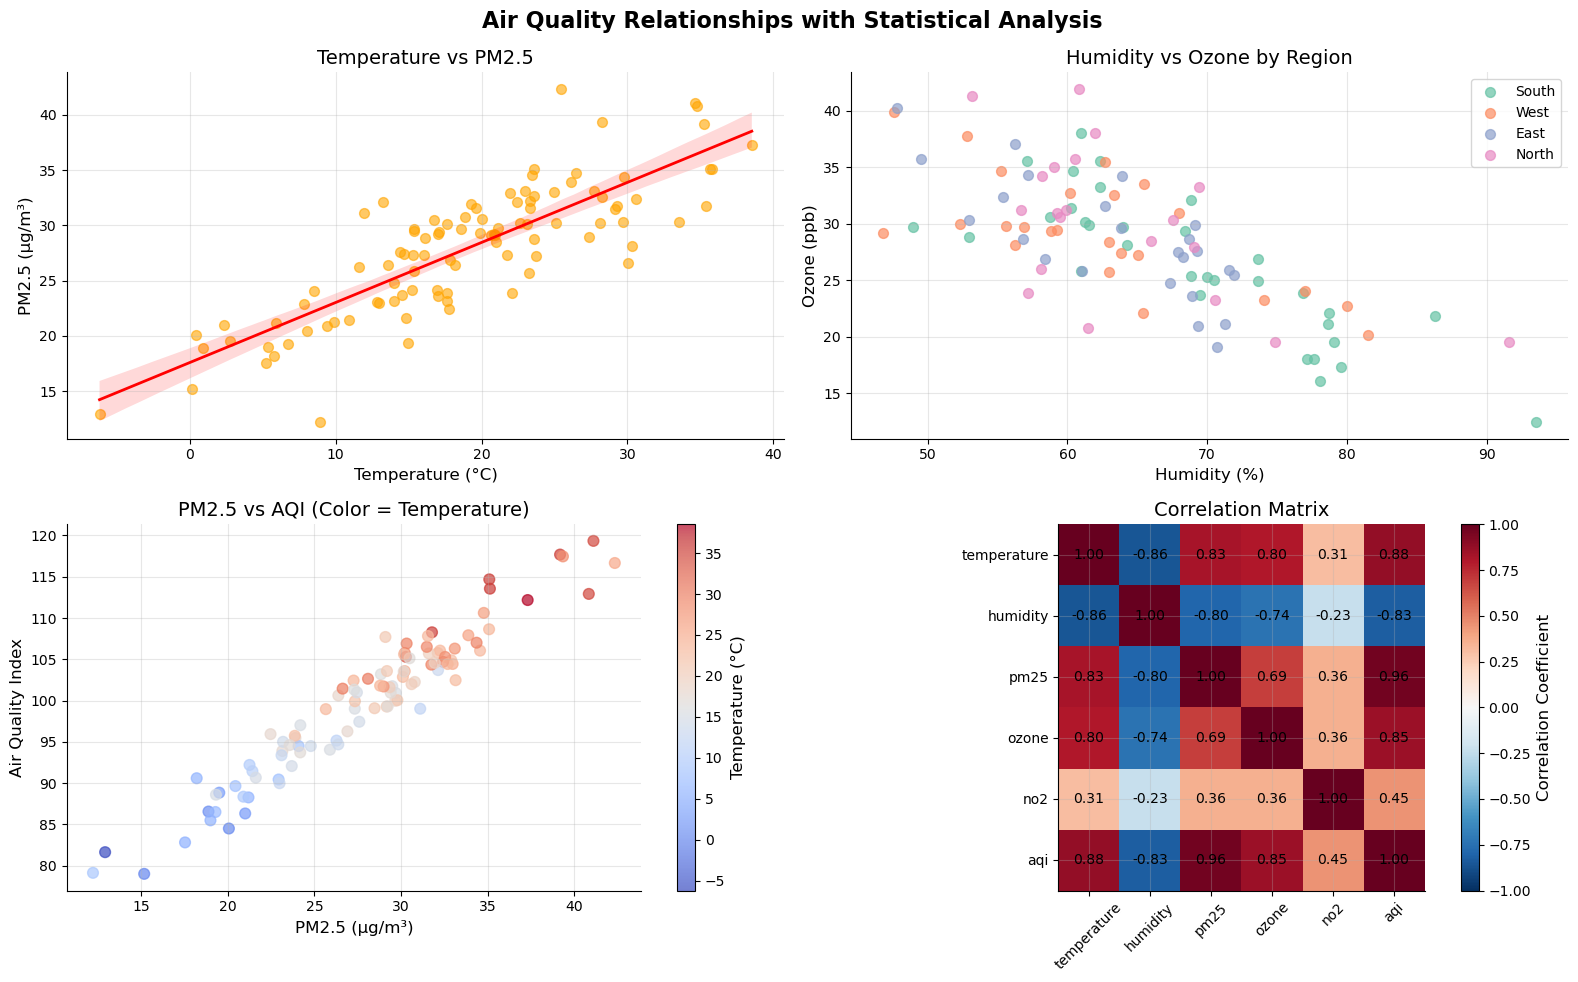

✅ Scatter plot analysis complete!

🔍 Key Insights:
• GDP-Life Expectancy correlation: r = -0.152
• Strongest air quality correlation: 0.962
• Log transformation often reveals linear relationships
• Grouping reveals different patterns across categories
• Size and color encoding add dimensionality to scatter plots


In [7]:
print("Creating comprehensive scatter plot examples...")

# 1. Basic scatter plot with trend analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Scatter Plot Techniques for Relationship Analysis', fontsize=16, fontweight='bold')

# Basic GDP vs Life Expectancy
axes[0, 0].scatter(gapminder['gdpPercap'], gapminder['lifeExp'], 
                  alpha=0.6, color='steelblue', s=50)
axes[0, 0].set_xlabel('GDP per Capita (USD)')
axes[0, 0].set_ylabel('Life Expectancy (years)')
axes[0, 0].set_title('Basic Scatter Plot')
axes[0, 0].grid(True, alpha=0.3)

# Add correlation coefficient
corr_coef, p_value = pearsonr(gapminder['gdpPercap'], gapminder['lifeExp'])
axes[0, 0].text(0.05, 0.95, f'r = {corr_coef:.3f}\np = {p_value:.3e}', 
               transform=axes[0, 0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Log-scale transformation
axes[0, 1].scatter(gapminder['gdp_log'], gapminder['lifeExp'], 
                  alpha=0.6, color='darkgreen', s=50)
axes[0, 1].set_xlabel('Log₁₀(GDP per Capita)')
axes[0, 1].set_ylabel('Life Expectancy (years)')
axes[0, 1].set_title('Log-Transformed X-axis')
axes[0, 1].grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(gapminder['gdp_log'], gapminder['lifeExp'], 1)
p = np.poly1d(z)
axes[0, 1].plot(gapminder['gdp_log'], p(gapminder['gdp_log']), 
               "r--", alpha=0.8, linewidth=2, label=f'y = {z[0]:.1f}x + {z[1]:.1f}')
axes[0, 1].legend()

# Grouped by categories with different colors
countries_subset = gapminder[gapminder['country'].isin(['United States', 'China', 'Germany', 'India', 'Brazil'])]
for country in countries_subset['country'].unique():
    country_data = countries_subset[countries_subset['country'] == country]
    axes[1, 0].scatter(country_data['gdpPercap'], country_data['lifeExp'], 
                      label=country, alpha=0.7, s=60)

axes[1, 0].set_xlabel('GDP per Capita (USD)')
axes[1, 0].set_ylabel('Life Expectancy (years)')
axes[1, 0].set_title('Grouped by Country')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# Bubble chart with size encoding
scatter = axes[1, 1].scatter(gapminder['gdpPercap'], gapminder['lifeExp'], 
                           s=gapminder['pop_millions']*3, alpha=0.6, 
                           c=gapminder['year'], cmap='viridis')
axes[1, 1].set_xlabel('GDP per Capita (USD)')
axes[1, 1].set_ylabel('Life Expectancy (years)')
axes[1, 1].set_title('Bubble Chart (Size = Population, Color = Year)')
axes[1, 1].grid(True, alpha=0.3)

# Add colorbar
plt.colorbar(scatter, ax=axes[1, 1], label='Year')

plt.tight_layout()
plt.show()

# 2. Advanced scatter plot matrix for penguins data
print("\n🐧 Creating penguin species comparison...")

# Select numeric columns for analysis
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_clean = penguins[['species'] + numeric_cols].dropna()

# Create a custom scatter plot matrix
fig, axes = plt.subplots(len(numeric_cols), len(numeric_cols), figsize=(15, 15))
fig.suptitle('Penguin Species Comparison Matrix', fontsize=16, fontweight='bold')

colors = {'Adelie': '#FF6B6B', 'Chinstrap': '#4ECDC4', 'Gentoo': '#45B7D1'}

for i, col_y in enumerate(numeric_cols):
    for j, col_x in enumerate(numeric_cols):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: histograms
            for species in penguins_clean['species'].unique():
                species_data = penguins_clean[penguins_clean['species'] == species]
                ax.hist(species_data[col_x], alpha=0.7, label=species, 
                       color=colors[species], bins=15)
            ax.set_ylabel('Frequency')
            if i == 0:
                ax.legend()
        else:
            # Off-diagonal: scatter plots
            for species in penguins_clean['species'].unique():
                species_data = penguins_clean[penguins_clean['species'] == species]
                ax.scatter(species_data[col_x], species_data[col_y], 
                          alpha=0.7, label=species, color=colors[species], s=30)
            
            # Calculate and display correlation
            corr = penguins_clean[col_x].corr(penguins_clean[col_y])
            ax.text(0.05, 0.95, f'r = {corr:.2f}', transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   verticalalignment='top')
        
        ax.set_xlabel(col_x.replace('_', ' ').title())
        ax.set_ylabel(col_y.replace('_', ' ').title())
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Air quality relationships with statistical overlays
print("\n🌬️ Analyzing air quality relationships...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Air Quality Relationships with Statistical Analysis', fontsize=16, fontweight='bold')

# Temperature vs PM2.5 with regression
axes[0, 0].scatter(air_quality['temperature'], air_quality['pm25'], 
                  alpha=0.6, color='orange', s=50)
# Add regression line with confidence interval
sns.regplot(data=air_quality, x='temperature', y='pm25', ax=axes[0, 0], 
           scatter=False, color='red', line_kws={'linewidth': 2})
axes[0, 0].set_title('Temperature vs PM2.5')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('PM2.5 (μg/m³)')

# Humidity vs Ozone by region
for region in air_quality['region'].unique():
    region_data = air_quality[air_quality['region'] == region]
    axes[0, 1].scatter(region_data['humidity'], region_data['ozone'], 
                      label=region, alpha=0.7, s=50)
axes[0, 1].set_title('Humidity vs Ozone by Region')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Ozone (ppb)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# AQI relationships with multiple variables
scatter1 = axes[1, 0].scatter(air_quality['pm25'], air_quality['aqi'], 
                             c=air_quality['temperature'], cmap='coolwarm',
                             s=60, alpha=0.7)
axes[1, 0].set_title('PM2.5 vs AQI (Color = Temperature)')
axes[1, 0].set_xlabel('PM2.5 (μg/m³)')
axes[1, 0].set_ylabel('Air Quality Index')
plt.colorbar(scatter1, ax=axes[1, 0], label='Temperature (°C)')

# Correlation heatmap preview
corr_vars = ['temperature', 'humidity', 'pm25', 'ozone', 'no2', 'aqi']
correlation_matrix = air_quality[corr_vars].corr()

im = axes[1, 1].imshow(correlation_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(corr_vars)))
axes[1, 1].set_yticks(range(len(corr_vars)))
axes[1, 1].set_xticklabels(corr_vars, rotation=45)
axes[1, 1].set_yticklabels(corr_vars)
axes[1, 1].set_title('Correlation Matrix')

# Add correlation values
for i in range(len(corr_vars)):
    for j in range(len(corr_vars)):
        text = axes[1, 1].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=axes[1, 1], label='Correlation Coefficient')

plt.tight_layout()
plt.show()

print("✅ Scatter plot analysis complete!")
print("\n🔍 Key Insights:")
print(f"• GDP-Life Expectancy correlation: r = {corr_coef:.3f}")
print(f"• Strongest air quality correlation: {correlation_matrix.abs().unstack().drop_duplicates().sort_values(ascending=False).iloc[1]:.3f}")
print("• Log transformation often reveals linear relationships")
print("• Grouping reveals different patterns across categories")
print("• Size and color encoding add dimensionality to scatter plots")

## 3. Correlation Matrices and Heatmaps

Correlation matrices provide a systematic way to examine relationships between multiple variables simultaneously. Heatmaps make these patterns visually apparent.

### Key Concepts:
- **Pearson correlation**: Linear relationships (-1 to +1)
- **Spearman correlation**: Monotonic relationships (rank-based)
- **Clustering**: Grouping similar variables together
- **Significance testing**: Statistical confidence in correlations

Creating correlation matrix and heatmap visualizations...


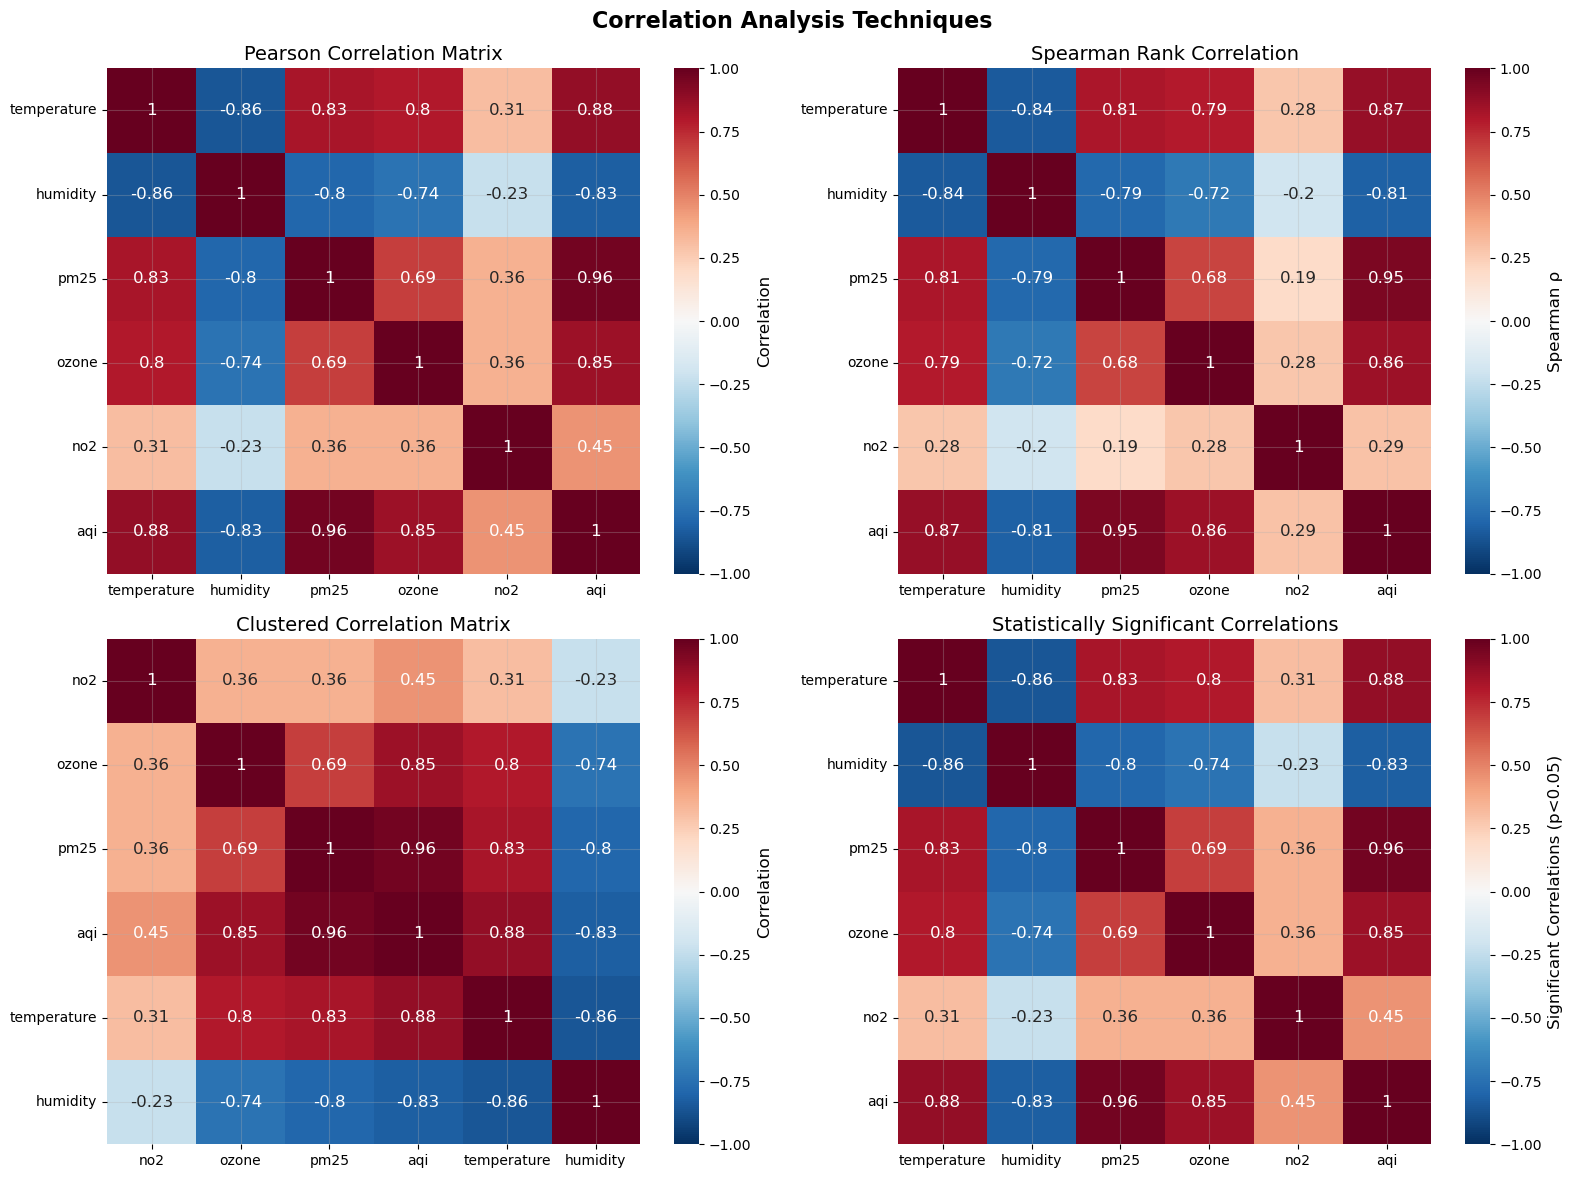


🎨 Creating interactive correlation heatmap...


✅ Correlation matrix analysis complete!

🔍 Key Insights:
• Pearson captures linear relationships
• Spearman better for monotonic non-linear patterns
• Clustering reveals variable groupings
• Statistical significance prevents false discoveries
• Interactive heatmaps enable detailed exploration


In [8]:
print("Creating correlation matrix and heatmap visualizations...")

# 1. Comprehensive correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Correlation Analysis Techniques', fontsize=16, fontweight='bold')

# Basic correlation heatmap for air quality data
corr_vars = ['temperature', 'humidity', 'pm25', 'ozone', 'no2', 'aqi']
correlation_matrix = air_quality[corr_vars].corr()

# Basic heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
           vmin=-1, vmax=1, ax=axes[0, 0], cbar_kws={'label': 'Correlation'})
axes[0, 0].set_title('Pearson Correlation Matrix')

# Spearman correlation for non-linear relationships
spearman_corr = air_quality[corr_vars].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='RdBu_r', center=0,
           vmin=-1, vmax=1, ax=axes[0, 1], cbar_kws={'label': 'Spearman ρ'})
axes[0, 1].set_title('Spearman Rank Correlation')

# Clustered correlation matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Calculate distance matrix and linkage
dist_matrix = 1 - correlation_matrix.abs()
linkage_matrix = linkage(squareform(dist_matrix), method='ward')

# Get cluster order
from scipy.cluster.hierarchy import leaves_list
cluster_order = leaves_list(linkage_matrix)
clustered_corr = correlation_matrix.iloc[cluster_order, cluster_order]

sns.heatmap(clustered_corr, annot=True, cmap='RdBu_r', center=0,
           vmin=-1, vmax=1, ax=axes[1, 0], cbar_kws={'label': 'Correlation'})
axes[1, 0].set_title('Clustered Correlation Matrix')

# Significance testing visualization
def calculate_p_values(df):
    """Calculate p-values for correlation matrix"""
    from scipy.stats import pearsonr
    
    n = len(df.columns)
    p_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                _, p_val = pearsonr(df.iloc[:, i], df.iloc[:, j])
                p_matrix[i, j] = p_val
            else:
                p_matrix[i, j] = 0
    
    return pd.DataFrame(p_matrix, columns=df.columns, index=df.columns)

p_values = calculate_p_values(air_quality[corr_vars])

# Create significance mask (p < 0.05)
mask = p_values > 0.05
masked_corr = correlation_matrix.copy()
masked_corr[mask] = 0

sns.heatmap(masked_corr, annot=True, cmap='RdBu_r', center=0,
           vmin=-1, vmax=1, ax=axes[1, 1], 
           cbar_kws={'label': 'Significant Correlations (p<0.05)'})
axes[1, 1].set_title('Statistically Significant Correlations')

plt.tight_layout()
plt.show()

# 2. Interactive correlation heatmap with Plotly
print("\n🎨 Creating interactive correlation heatmap...")

# Create interactive heatmap
fig_interactive = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    zmin=-1,
    zmax=1,
    text=correlation_matrix.round(3).values,
    texttemplate='%{text}',
    textfont={'size': 12},
    hovertemplate='<b>%{x} vs %{y}</b><br>Correlation: %{z:.3f}<extra></extra>'
))

fig_interactive.update_layout(
    title='Interactive Air Quality Correlation Matrix',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=600,
    height=600,
    font=dict(size=12)
)

fig_interactive.show()

print("✅ Correlation matrix analysis complete!")
print("\n🔍 Key Insights:")
print("• Pearson captures linear relationships")
print("• Spearman better for monotonic non-linear patterns") 
print("• Clustering reveals variable groupings")
print("• Statistical significance prevents false discoveries")
print("• Interactive heatmaps enable detailed exploration")

## 4. Pair Plots and Multivariate Exploration

Pair plots (scatter plot matrices) show relationships between all pairs of variables simultaneously, making them invaluable for exploratory data analysis.

### Key Concepts:
- **Diagonal plots**: Distribution of individual variables
- **Off-diagonal plots**: Pairwise relationships
- **Grouping by categories**: Color-coding for different groups
- **Regression lines**: Trend identification across pairs

Creating pair plots and multivariate exploration...
🐧 Penguin species pair plot...


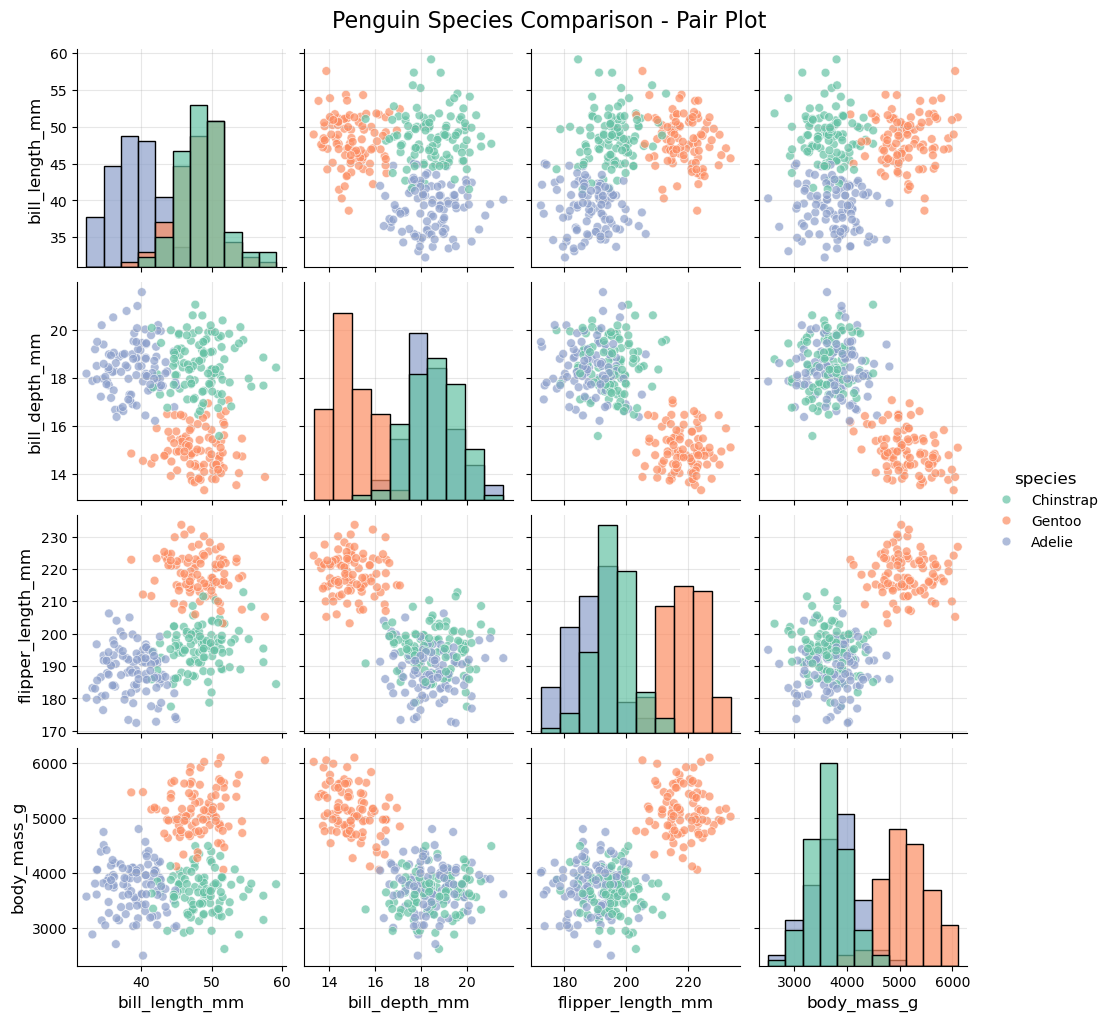


📊 Custom pair plot with enhanced features...


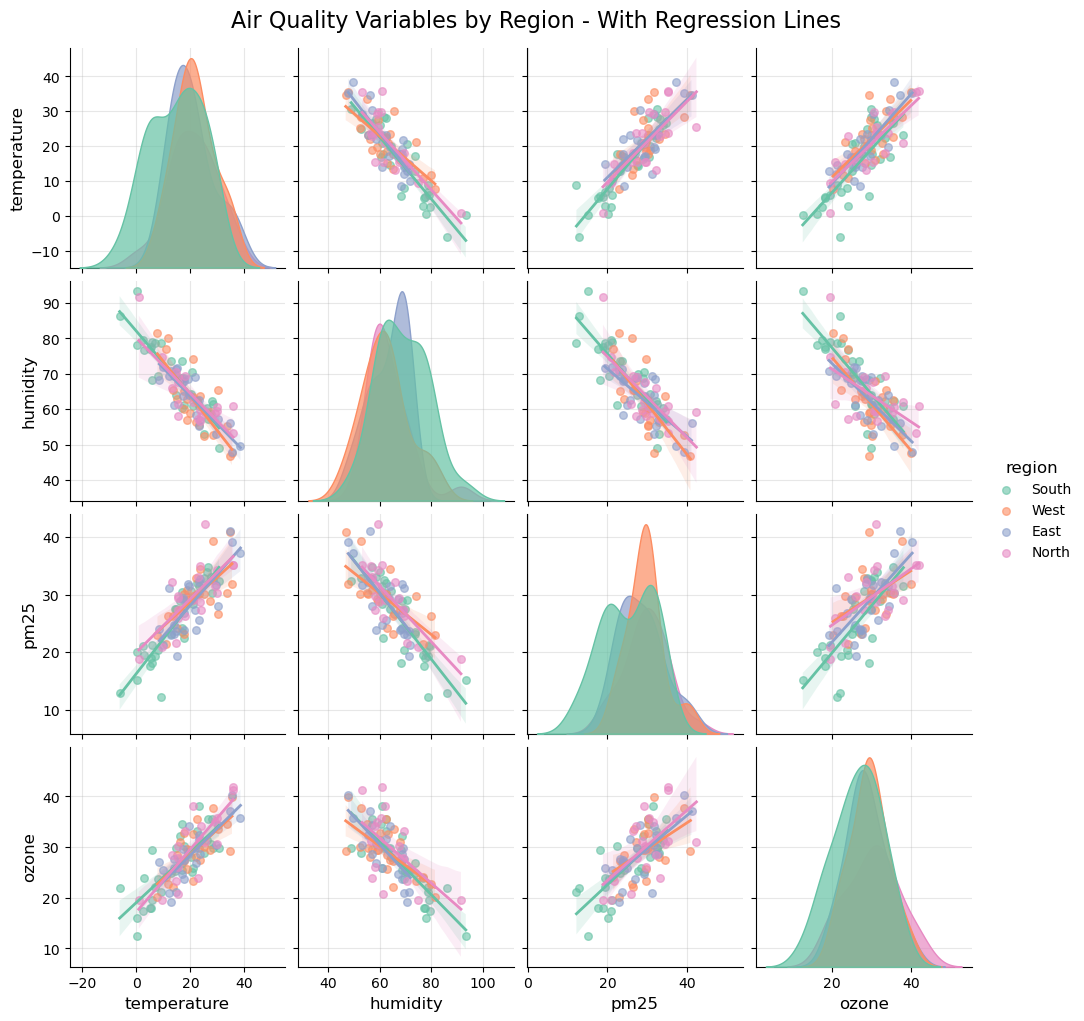


🎨 Mixed plot types pair plot...


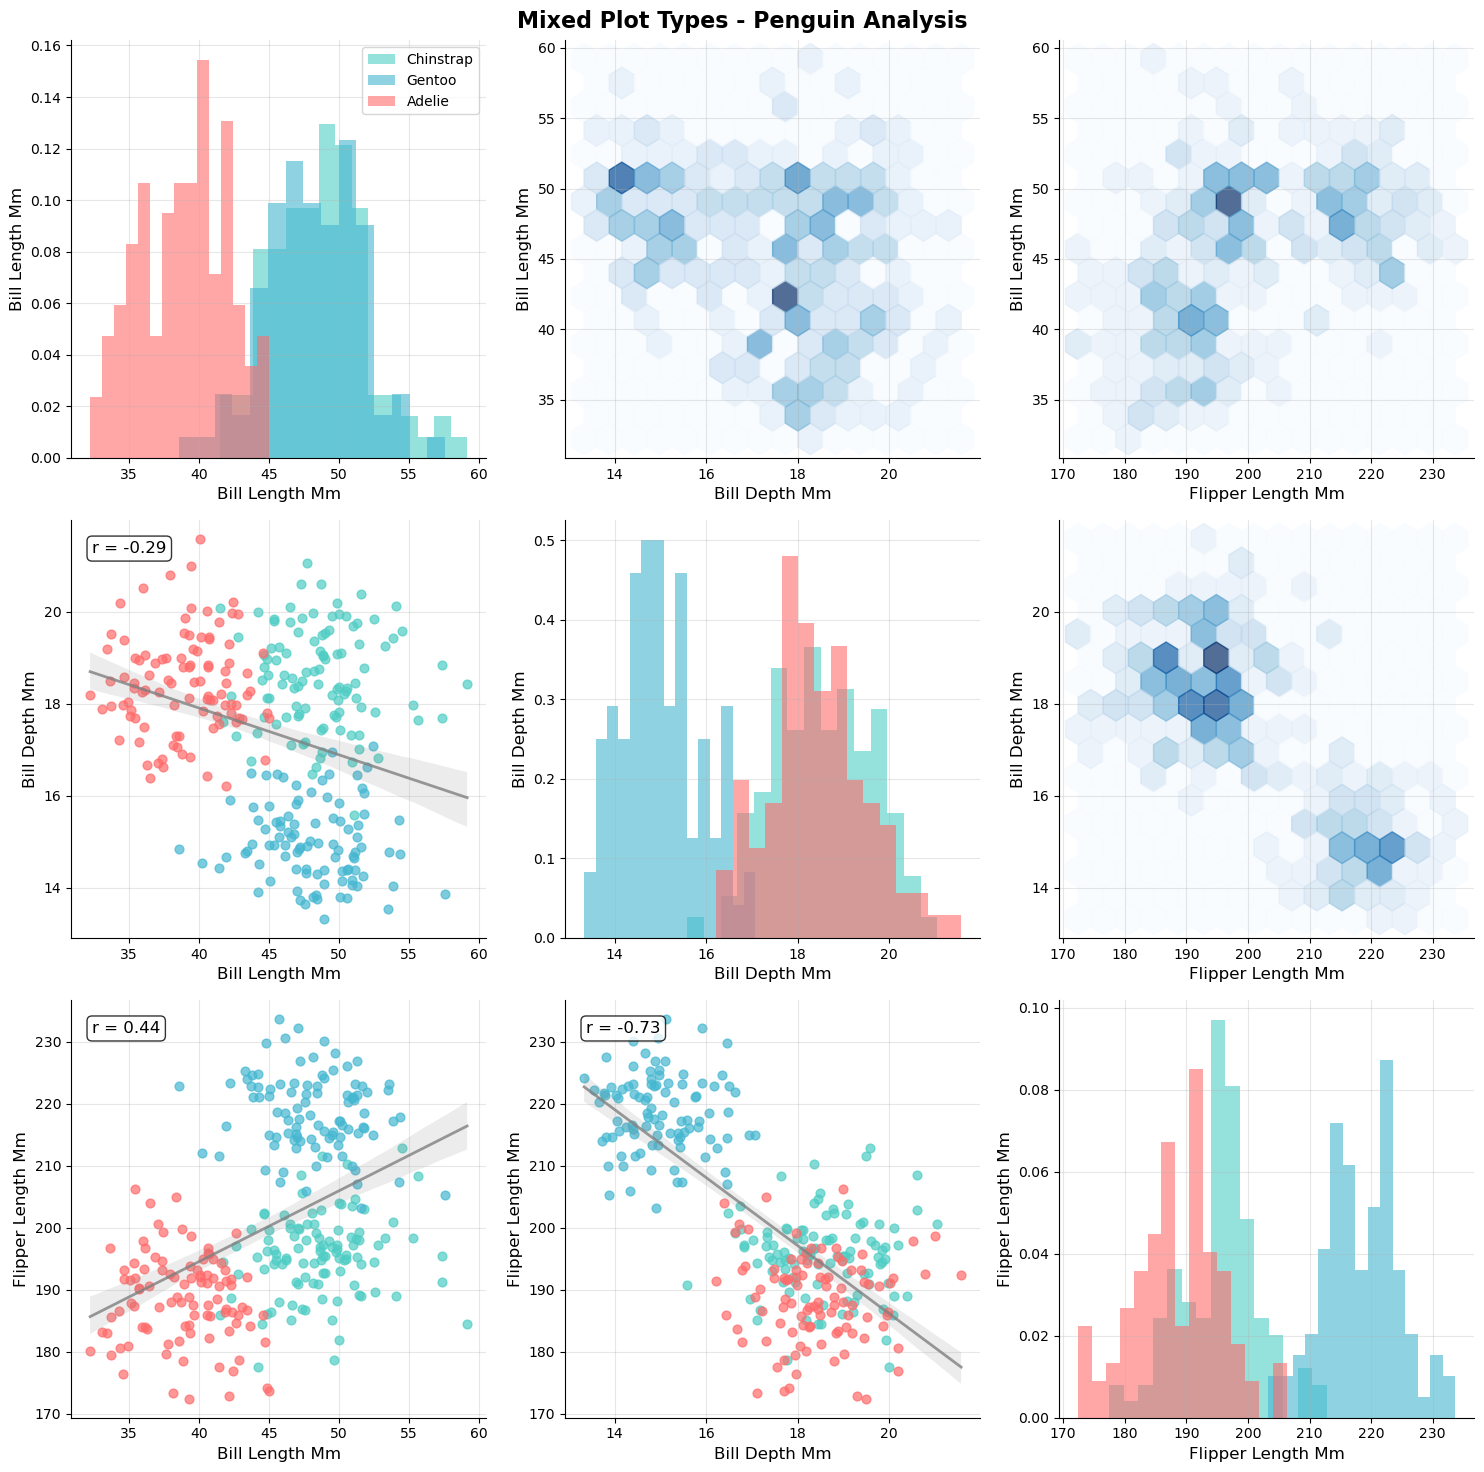


🔍 Interactive multivariate exploration...



📈 Group-wise correlation analysis...


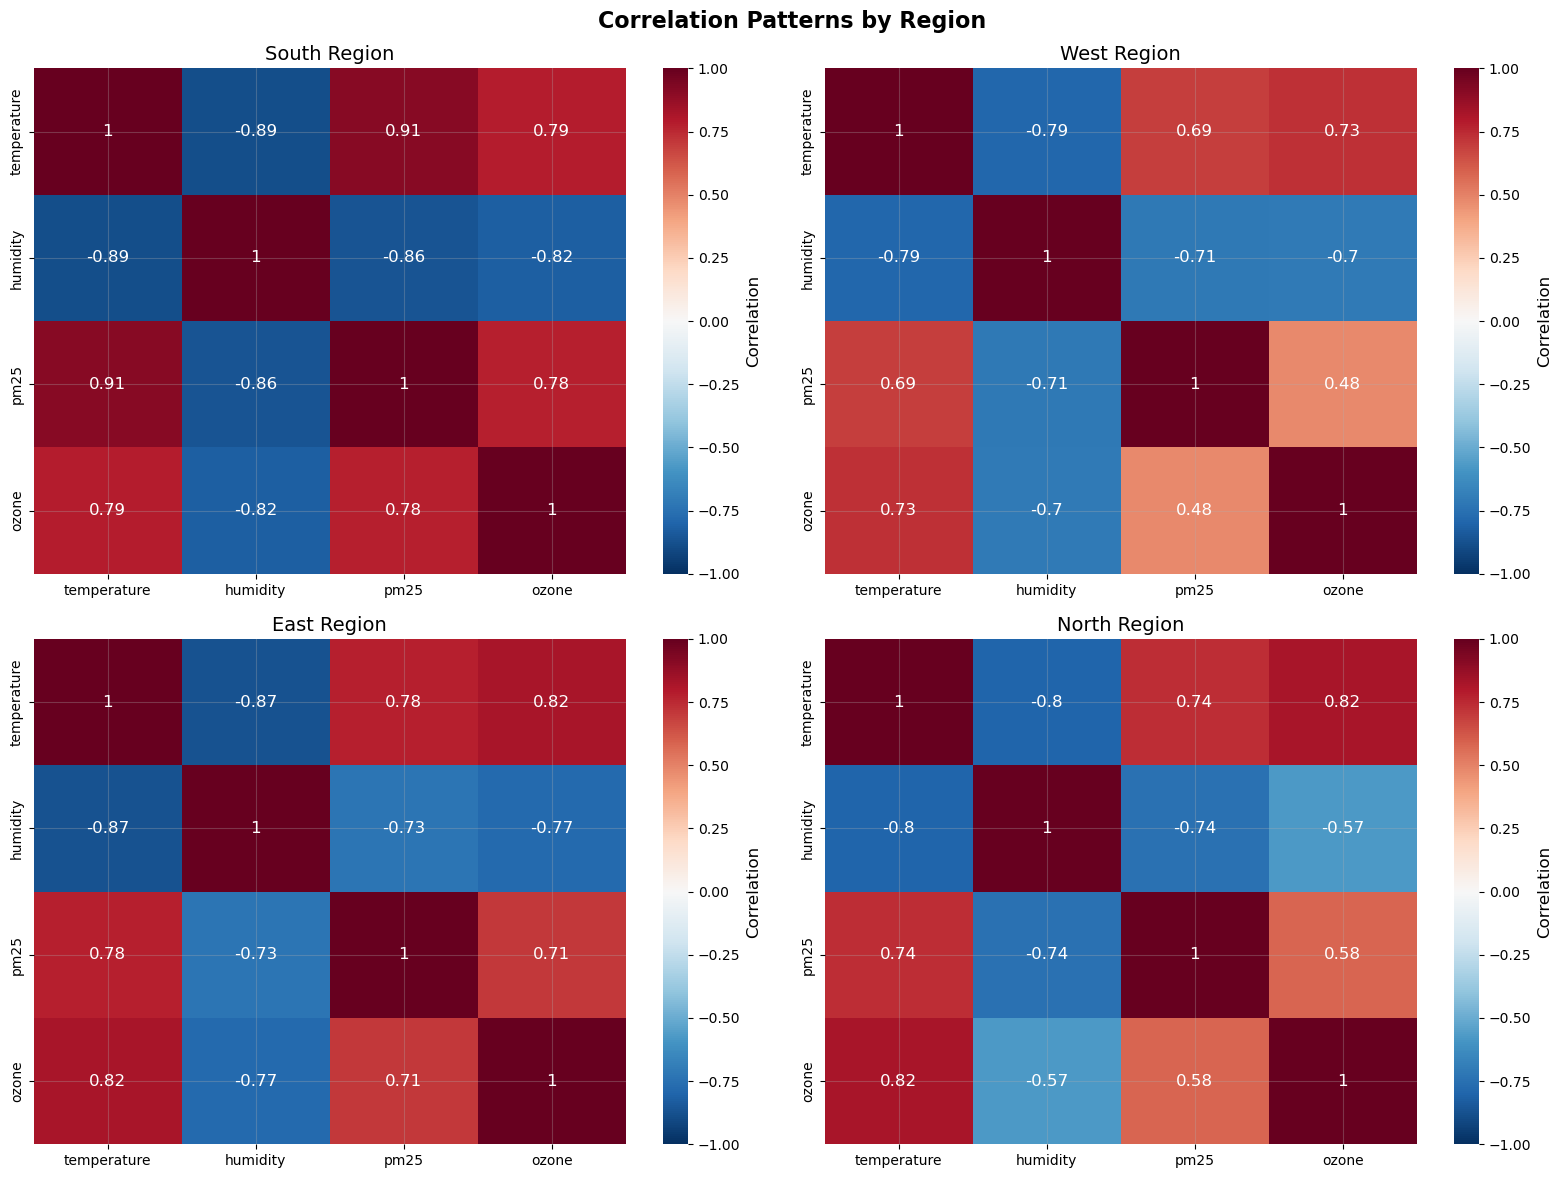

✅ Pair plot analysis complete!

🔍 Key Insights:
• Pair plots reveal multivariate patterns at a glance
• Diagonal plots show individual variable distributions
• Grouping by categories reveals cluster patterns
• Interactive plots enable detailed exploration
• Correlation patterns can vary significantly by group


In [9]:
print("Creating pair plots and multivariate exploration...")

# 1. Seaborn pair plot for penguin data
print("🐧 Penguin species pair plot...")

# Select numeric columns for analysis
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_clean = penguins[['species'] + numeric_cols].dropna()

# Create pair plot with species grouping
g = sns.pairplot(penguins_clean, hue='species', diag_kind='hist',
                plot_kws={'alpha': 0.7, 's': 40},
                diag_kws={'alpha': 0.7})
g.fig.suptitle('Penguin Species Comparison - Pair Plot', y=1.02, fontsize=16)
plt.show()

# 2. Custom pair plot with regression lines
print("\n📊 Custom pair plot with enhanced features...")

# Create custom pair plot for air quality data
vars_to_plot = ['temperature', 'humidity', 'pm25', 'ozone']
air_subset = air_quality[vars_to_plot + ['region']].copy()

g = sns.pairplot(air_subset, hue='region', kind='reg',
                plot_kws={'scatter_kws': {'alpha': 0.6, 's': 30},
                         'line_kws': {'linewidth': 2}},
                diag_kws={'alpha': 0.7})
g.fig.suptitle('Air Quality Variables by Region - With Regression Lines', y=1.02, fontsize=16)
plt.show()

# 3. Advanced pair plot with different plot types
print("\n🎨 Mixed plot types pair plot...")

# Create figure for custom pair plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Mixed Plot Types - Penguin Analysis', fontsize=16, fontweight='bold')

# Define variables and colors
vars_to_analyze = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
colors = {'Adelie': '#FF6B6B', 'Chinstrap': '#4ECDC4', 'Gentoo': '#45B7D1'}

for i, var_y in enumerate(vars_to_analyze):
    for j, var_x in enumerate(vars_to_analyze):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: density plots
            for species in penguins_clean['species'].unique():
                species_data = penguins_clean[penguins_clean['species'] == species]
                ax.hist(species_data[var_x], alpha=0.6, label=species, 
                       color=colors[species], bins=15, density=True)
            ax.set_ylabel('Density')
            if i == 0:
                ax.legend(loc='upper right')
        elif i > j:
            # Lower triangle: scatter plots with regression
            for species in penguins_clean['species'].unique():
                species_data = penguins_clean[penguins_clean['species'] == species]
                ax.scatter(species_data[var_x], species_data[var_y], 
                          alpha=0.7, label=species, color=colors[species], s=40)
            
            # Add overall regression line
            sns.regplot(data=penguins_clean, x=var_x, y=var_y, ax=ax,
                       scatter=False, color='gray', line_kws={'linewidth': 2, 'alpha': 0.8})
            
            # Add correlation coefficient
            corr = penguins_clean[var_x].corr(penguins_clean[var_y])
            ax.text(0.05, 0.95, f'r = {corr:.2f}', transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   verticalalignment='top')
        else:
            # Upper triangle: hexbin plots
            ax.hexbin(penguins_clean[var_x], penguins_clean[var_y], 
                     gridsize=15, cmap='Blues', alpha=0.7)
            
        ax.set_xlabel(var_x.replace('_', ' ').title())
        ax.set_ylabel(var_y.replace('_', ' ').title())
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Interactive pair plot with Plotly
print("\n🔍 Interactive multivariate exploration...")

# Create interactive scatter matrix
fig = px.scatter_matrix(
    penguins_clean,
    dimensions=numeric_cols,
    color='species',
    title="Interactive Penguin Species Analysis",
    height=700,
    color_discrete_map={'Adelie': '#FF6B6B', 'Chinstrap': '#4ECDC4', 'Gentoo': '#45B7D1'}
)

# Update traces for better visibility
fig.update_traces(diagonal_visible=False, marker=dict(size=4, opacity=0.7))

# Update layout
fig.update_layout(
    font=dict(size=10),
    title_font_size=16
)

fig.show()

# 5. Correlation comparison across groups
print("\n📈 Group-wise correlation analysis...")

# Compare correlations between regions
regions = air_quality['region'].unique()
correlation_by_region = {}

for region in regions:
    region_data = air_quality[air_quality['region'] == region]
    correlation_by_region[region] = region_data[vars_to_plot].corr()

# Create subplot for regional correlations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Correlation Patterns by Region', fontsize=16, fontweight='bold')

for i, region in enumerate(regions):
    row, col = i // 2, i % 2
    sns.heatmap(correlation_by_region[region], annot=True, cmap='RdBu_r', 
               center=0, vmin=-1, vmax=1, ax=axes[row, col],
               cbar_kws={'label': 'Correlation'})
    axes[row, col].set_title(f'{region} Region')

plt.tight_layout()
plt.show()

print("✅ Pair plot analysis complete!")
print("\n🔍 Key Insights:")
print("• Pair plots reveal multivariate patterns at a glance")
print("• Diagonal plots show individual variable distributions")
print("• Grouping by categories reveals cluster patterns")
print("• Interactive plots enable detailed exploration")
print("• Correlation patterns can vary significantly by group")

## 5. Comparison Charts and Best Practices

Effective comparison visualizations help audiences understand differences and relationships between groups, time periods, or conditions.

### Key Concepts:
- **Small multiples**: Consistent scales for fair comparison
- **Reference lines**: Baselines and benchmarks
- **Error bars**: Uncertainty in group comparisons
- **Accessibility**: Color-blind friendly comparisons

Creating comparison charts and demonstrating best practices...
📊 Small multiples comparison...


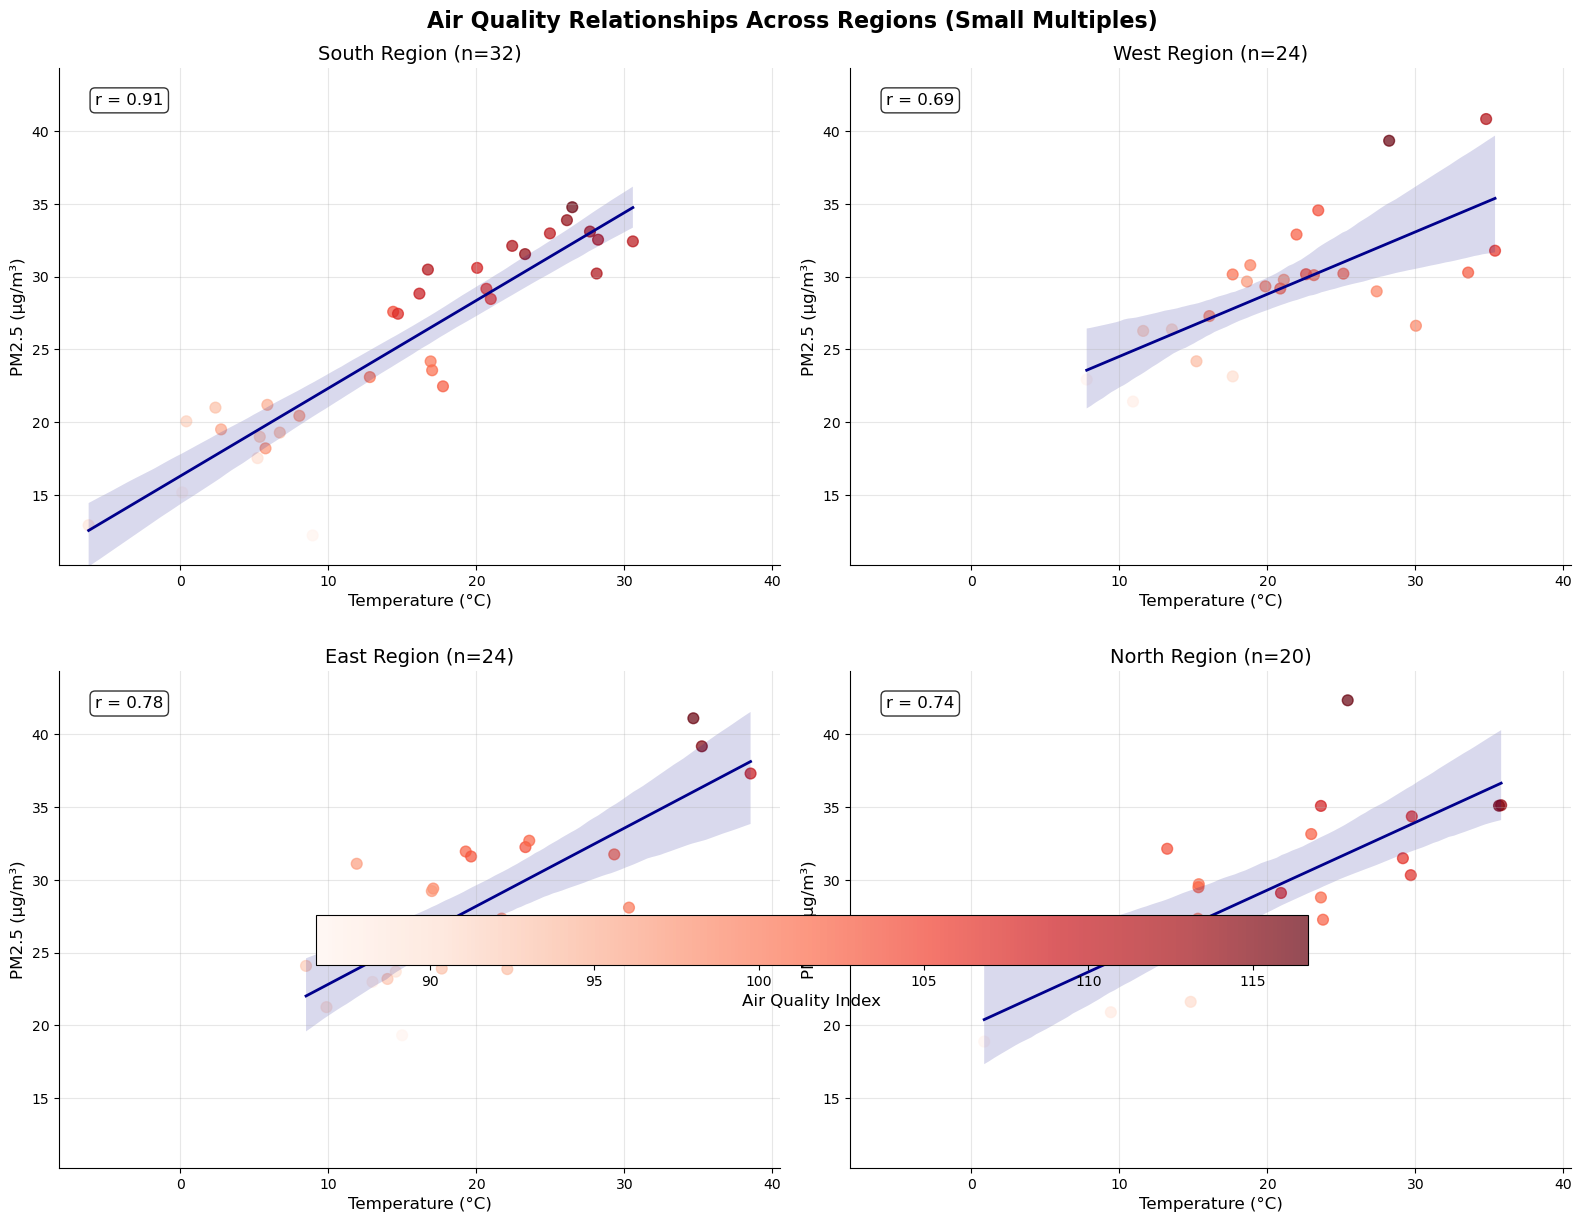


📈 Statistical group comparisons...


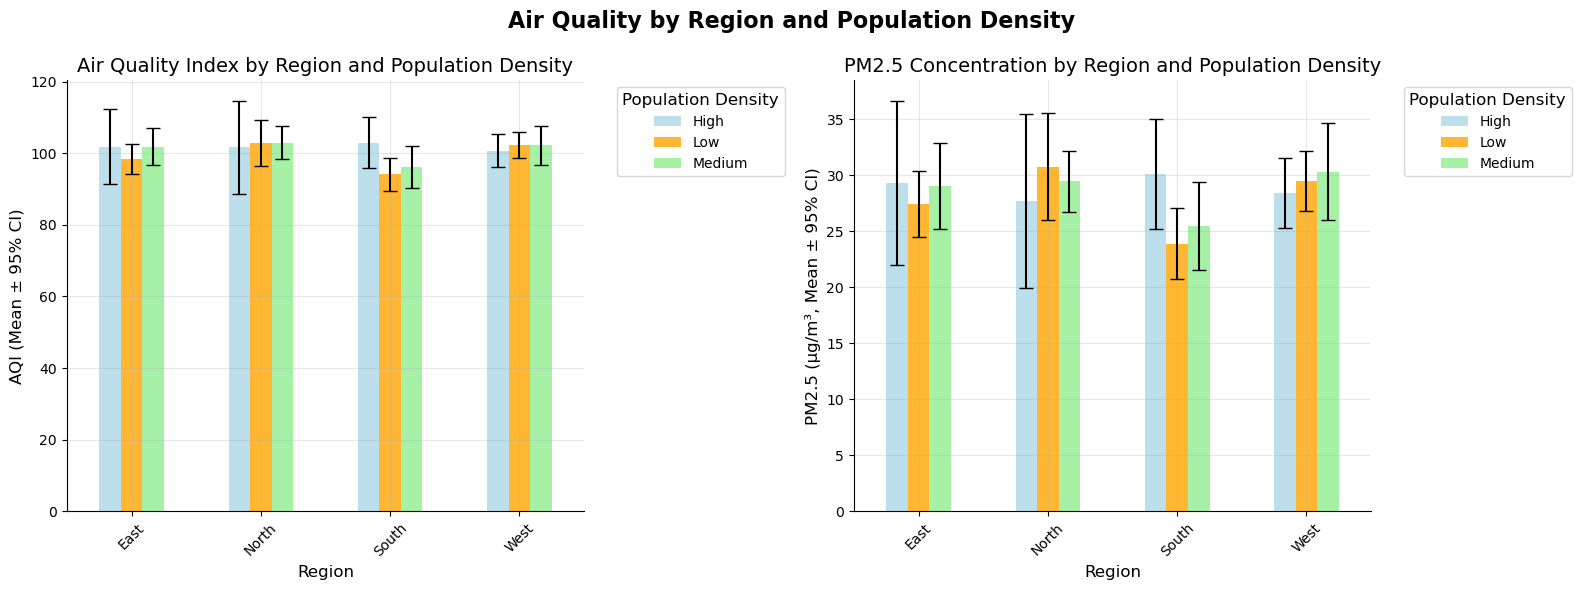


🎨 Before vs After: Visualization improvements...


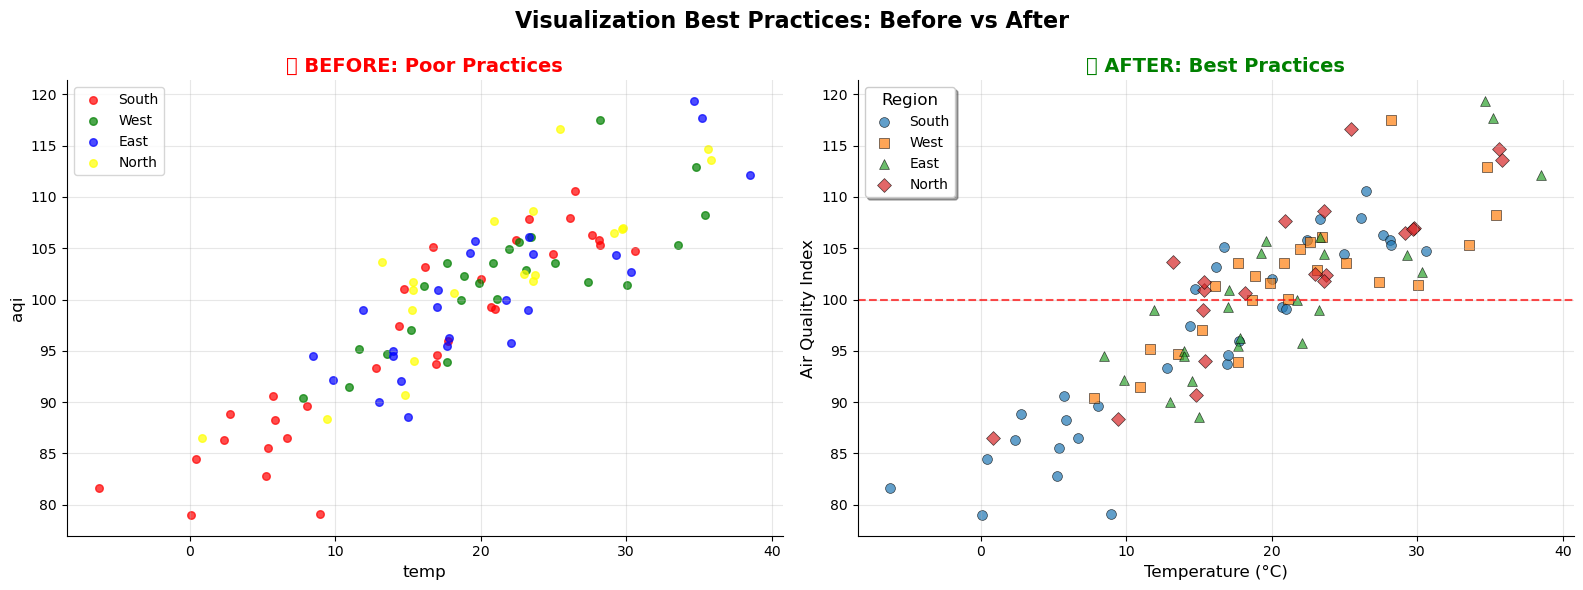


📋 Relationship Visualization Best Practices Checklist:
✅ Choose appropriate correlation measures (Pearson vs Spearman)
✅ Use consistent scales for fair comparisons
✅ Include confidence intervals or error bars
✅ Apply colorblind-friendly palettes
✅ Add patterns/markers for accessibility
✅ Test statistical significance of correlations
✅ Distinguish correlation from causation
✅ Use small multiples for group comparisons
✅ Include sample sizes in group comparisons
✅ Add reference lines and benchmarks
✅ Provide clear axis labels and units
✅ Use interactive features for exploration

🎯 Module 5 Summary:
• Scatter plots for exploring relationships
• Correlation matrices and heatmaps
• Pair plots for multivariate analysis
• Statistical significance testing
• Group comparison techniques
• Interactive relationship exploration
• Best practices for accessible comparisons

🎉 Module 5: Comparisons and Relationships - COMPLETE!


In [10]:
print("Creating comparison charts and demonstrating best practices...")

# 1. Small multiples for group comparisons
print("📊 Small multiples comparison...")

# Create small multiples for different regions
regions = air_quality['region'].unique()
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Air Quality Relationships Across Regions (Small Multiples)', 
             fontsize=16, fontweight='bold')

for i, region in enumerate(regions):
    row, col = i // 2, i % 2
    region_data = air_quality[air_quality['region'] == region]
    
    # Scatter plot with consistent scales
    scatter = axes[row, col].scatter(region_data['temperature'], region_data['pm25'],
                                   c=region_data['aqi'], cmap='Reds', 
                                   alpha=0.7, s=60)
    
    # Add regression line
    sns.regplot(data=region_data, x='temperature', y='pm25', ax=axes[row, col],
               scatter=False, color='darkblue', line_kws={'linewidth': 2})
    
    axes[row, col].set_title(f'{region} Region (n={len(region_data)})')
    axes[row, col].set_xlabel('Temperature (°C)')
    axes[row, col].set_ylabel('PM2.5 (μg/m³)')
    axes[row, col].grid(True, alpha=0.3)
    
    # Ensure consistent scales across all subplots
    axes[row, col].set_xlim(air_quality['temperature'].min() - 2, 
                           air_quality['temperature'].max() + 2)
    axes[row, col].set_ylim(air_quality['pm25'].min() - 2, 
                           air_quality['pm25'].max() + 2)
    
    # Add correlation coefficient
    corr = region_data['temperature'].corr(region_data['pm25'])
    axes[row, col].text(0.05, 0.95, f'r = {corr:.2f}', transform=axes[row, col].transAxes,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                       verticalalignment='top')

# Add a single colorbar for all subplots
cbar = plt.colorbar(scatter, ax=axes, orientation='horizontal', 
                   pad=0.1, shrink=0.8, label='Air Quality Index')

plt.tight_layout()
plt.show()

# 2. Group comparison with error bars
print("\n📈 Statistical group comparisons...")

# Calculate summary statistics by region and population density
summary_stats = air_quality.groupby(['region', 'population_density']).agg({
    'aqi': ['mean', 'std', 'count'],
    'pm25': ['mean', 'std', 'count']
}).round(2)

# Flatten column names
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns]
summary_stats = summary_stats.reset_index()

# Calculate confidence intervals
summary_stats['aqi_ci'] = 1.96 * summary_stats['aqi_std'] / np.sqrt(summary_stats['aqi_count'])
summary_stats['pm25_ci'] = 1.96 * summary_stats['pm25_std'] / np.sqrt(summary_stats['pm25_count'])

# Create comparison plot with error bars
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Air Quality by Region and Population Density', fontsize=16, fontweight='bold')

# AQI comparison
pivot_aqi = summary_stats.pivot(index='region', columns='population_density', values='aqi_mean')
pivot_aqi_err = summary_stats.pivot(index='region', columns='population_density', values='aqi_ci')

pivot_aqi.plot(kind='bar', ax=axes[0], yerr=pivot_aqi_err, capsize=5, 
              color=['lightblue', 'orange', 'lightgreen'], alpha=0.8)
axes[0].set_title('Air Quality Index by Region and Population Density')
axes[0].set_ylabel('AQI (Mean ± 95% CI)')
axes[0].set_xlabel('Region')
axes[0].legend(title='Population Density', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# PM2.5 comparison
pivot_pm25 = summary_stats.pivot(index='region', columns='population_density', values='pm25_mean')
pivot_pm25_err = summary_stats.pivot(index='region', columns='population_density', values='pm25_ci')

pivot_pm25.plot(kind='bar', ax=axes[1], yerr=pivot_pm25_err, capsize=5,
               color=['lightblue', 'orange', 'lightgreen'], alpha=0.8)
axes[1].set_title('PM2.5 Concentration by Region and Population Density')
axes[1].set_ylabel('PM2.5 (μg/m³, Mean ± 95% CI)')
axes[1].set_xlabel('Region')
axes[1].legend(title='Population Density', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# 3. Before/After comparison demonstration
print("\n🎨 Before vs After: Visualization improvements...")

# Poor visualization example
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualization Best Practices: Before vs After', fontsize=16, fontweight='bold')

# BEFORE: Poor visualization
colors_poor = ['red', 'green', 'blue', 'yellow']  # Poor color choice
for i, region in enumerate(regions):
    region_data = air_quality[air_quality['region'] == region]
    axes[0].scatter(region_data['temperature'], region_data['aqi'], 
                   color=colors_poor[i], label=region, alpha=0.7, s=30)

axes[0].set_title('❌ BEFORE: Poor Practices', color='red', fontweight='bold')
axes[0].set_xlabel('temp')  # Poor label
axes[0].set_ylabel('aqi')   # Poor label
axes[0].legend()

# AFTER: Good visualization
colors_good = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colorblind-friendly
markers = ['o', 's', '^', 'D']  # Different markers for accessibility

for i, region in enumerate(regions):
    region_data = air_quality[air_quality['region'] == region]
    axes[1].scatter(region_data['temperature'], region_data['aqi'],
                   color=colors_good[i], marker=markers[i], label=region, 
                   alpha=0.7, s=50, edgecolors='black', linewidth=0.5)

axes[1].set_title('✅ AFTER: Best Practices', color='green', fontweight='bold')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Air Quality Index')
axes[1].legend(title='Region', frameon=True, fancybox=True, shadow=True)
axes[1].grid(True, alpha=0.3)

# Add reference line
axes[1].axhline(y=100, color='red', linestyle='--', alpha=0.7, 
               label='Unhealthy AQI Threshold')

plt.tight_layout()
plt.show()

# 4. Final summary and best practices checklist
print("\n📋 Relationship Visualization Best Practices Checklist:")
print("✅ Choose appropriate correlation measures (Pearson vs Spearman)")
print("✅ Use consistent scales for fair comparisons")
print("✅ Include confidence intervals or error bars")
print("✅ Apply colorblind-friendly palettes")
print("✅ Add patterns/markers for accessibility")
print("✅ Test statistical significance of correlations")
print("✅ Distinguish correlation from causation")
print("✅ Use small multiples for group comparisons")
print("✅ Include sample sizes in group comparisons")
print("✅ Add reference lines and benchmarks")
print("✅ Provide clear axis labels and units")
print("✅ Use interactive features for exploration")

print("\n🎯 Module 5 Summary:")
print("• Scatter plots for exploring relationships")
print("• Correlation matrices and heatmaps")
print("• Pair plots for multivariate analysis")
print("• Statistical significance testing")
print("• Group comparison techniques")
print("• Interactive relationship exploration")
print("• Best practices for accessible comparisons")
print("\n🎉 Module 5: Comparisons and Relationships - COMPLETE!")